In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##  Clasificación de imágenes

**Carga e inspección del dataset**

Vamos a cargar un dataset que contiene imágenes de dígitos para hacer una tarea de reconocimiento de caracteres. Cada línea del fichero contiene 785 valores, el primero es la etiqueta del dígito representado y los 784 restantes los pixeles de una imagen de 28x28 representando un dígito. Fíjate cómo separamos la columna 0 del resto.

Cada pixel tiene un valor de luminosidad entre 0 y 255.


In [2]:
mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
print "dimension de los datos originales", mnist.shape
d=mnist[:,1:785]
c=mnist[:,0]
print "dimension de las imagenes y las clases", d.shape, c.shape
print "luminosidad maxima", np.max(d)
print "luminosidad minimo", np.min(d)

dimension de los datos originales (1500, 785)
dimension de las imagenes y las clases (1500, 784) (1500,)
luminosidad maxima 255.0
luminosidad minimo 0.0


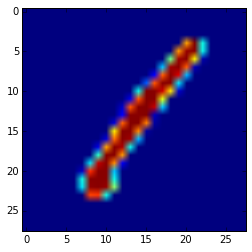

In [10]:
plt.imshow(d[0].reshape(28,28))#, cmap=plt.cm.Greys_r)


Mostramos aleatoriamente algunos de los dígitos. Fíjate cómo usamos `reshape` para convertir un vector de 784 elementos en una matriz de 28x28 e interpretarla como una imagen.

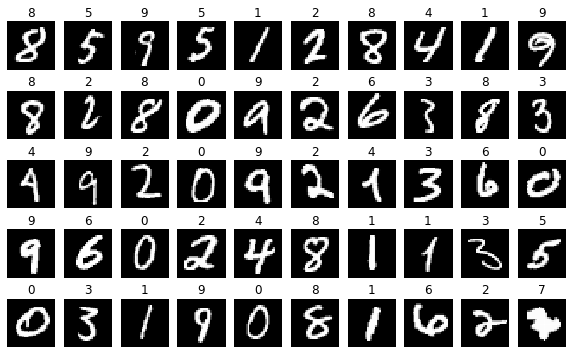

In [11]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Vemos también la distribución de clases, es decir, cuántas imágenes tenemos para cada dígito.

In [13]:
print "digito   número de imágenes"
for i in np.unique(c):
    print "   ",int(i), "   ", np.sum(c==i)

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


** Entrenamiento y predicción **

Usamos el algoritmo **Naive Bayes** de clasificación para tratar de identificar automáticamente los dígitos. Fíjate como dividimos primero las imágenes y las etiquetas en un 80% para train y un 20% para test. ¿Qué tal se comporta el algoritmo? ¿Clasifica bien los dígitos? ¿Qué dígitos clasifica peor? ¿Por qué crees que es?

In [20]:
from sklearn import cross_validation

test_size = 0.2

d_train, d_test, c_train, c_test = cross_validation.train_test_split(d, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
print d_train.shape, d_test.shape
print c_train.shape, c_test.shape

(1200, 784) (300, 784)
(1200,) (300,)


/opt/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

test_size = 0.2

d_train, d_test, c_train, c_test = cross_validation.train_test_split(d, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

g = SVC()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print "matrix de confusión en train\n", cm_train
print "matrix de confusión en test\n", cm_test
print "verifica número de imágenes en total por columna"
print np.sum(cm_train+cm_test, axis=1)

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 1.0
acierto en test  0.1
matrix de confusión en train
[[117   0   0   0   0   0   0   0   0   0]
 [  0 122   0   0   0   0   0   0   0   0]
 [  0   0 156   0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0]
 [  0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   0   0 116   0   0   0   0]
 [  0   0   0   0   0   0 112   0   0   0]
 [  0   0   0   0   0   0   0 131   0   0]
 [  0   0   0   0   0   0   0   0 114   0]
 [  0   0   0   0   0   0   0   0   0 108]]
matrix de confusión en test
[[ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]]
verifica número de imágenes en total por columna
[150 157 186 125

In [23]:
c_test

array([ 5.,  2.,  5.,  1.,  2.,  2.,  7.,  1.,  5.,  9.,  0.,  1.,  6.,
        9.,  0.,  5.,  2.,  8.,  4.,  6.,  1.,  1.,  2.,  3.,  4.,  5.,
        7.,  2.,  9.,  0.,  7.,  2.,  9.,  6.,  8.,  7.,  7.,  2.,  3.,
        8.,  0.,  8.,  4.,  0.,  8.,  5.,  2.,  7.,  5.,  6.,  2.,  7.,
        7.,  5.,  3.,  2.,  2.,  8.,  3.,  9.,  6.,  6.,  1.,  9.,  5.,
        5.,  7.,  5.,  1.,  7.,  2.,  2.,  3.,  9.,  1.,  0.,  9.,  8.,
        4.,  5.,  7.,  0.,  1.,  4.,  1.,  4.,  9.,  3.,  6.,  2.,  0.,
        7.,  3.,  2.,  0.,  2.,  7.,  2.,  8.,  9.,  1.,  3.,  6.,  4.,
        7.,  7.,  9.,  4.,  5.,  9.,  0.,  0.,  9.,  5.,  6.,  2.,  0.,
        8.,  2.,  9.,  0.,  1.,  7.,  1.,  9.,  9.,  2.,  4.,  7.,  4.,
        0.,  1.,  0.,  4.,  3.,  2.,  0.,  1.,  7.,  8.,  7.,  7.,  5.,
        0.,  6.,  6.,  2.,  3.,  7.,  0.,  9.,  3.,  3.,  6.,  3.,  5.,
        3.,  5.,  3.,  4.,  4.,  8.,  1.,  7.,  2.,  7.,  4.,  1.,  3.,
        0.,  4.,  9.,  1.,  3.,  0.,  0.,  6.,  5.,  4.,  3.,  2

In [24]:
predicciones_test

array([ 8.,  6.,  0.,  1.,  2.,  6.,  9.,  1.,  8.,  9.,  0.,  1.,  6.,
        9.,  6.,  0.,  2.,  1.,  7.,  6.,  9.,  1.,  5.,  3.,  7.,  4.,
        9.,  6.,  7.,  0.,  9.,  2.,  9.,  6.,  8.,  8.,  7.,  6.,  8.,
        3.,  0.,  4.,  9.,  0.,  8.,  8.,  2.,  7.,  5.,  6.,  3.,  7.,
        9.,  5.,  3.,  6.,  2.,  8.,  8.,  9.,  6.,  1.,  1.,  9.,  5.,
        0.,  9.,  5.,  1.,  7.,  2.,  8.,  2.,  9.,  1.,  8.,  9.,  8.,
        9.,  5.,  9.,  0.,  1.,  4.,  1.,  4.,  8.,  3.,  6.,  8.,  0.,
        7.,  3.,  3.,  0.,  6.,  9.,  4.,  4.,  9.,  1.,  5.,  6.,  4.,
        7.,  9.,  9.,  9.,  0.,  9.,  0.,  0.,  2.,  8.,  6.,  6.,  0.,
        8.,  1.,  9.,  0.,  1.,  9.,  1.,  7.,  9.,  2.,  4.,  9.,  9.,
        0.,  1.,  0.,  9.,  3.,  2.,  0.,  1.,  9.,  2.,  7.,  7.,  8.,
        0.,  6.,  2.,  6.,  8.,  7.,  0.,  9.,  0.,  1.,  6.,  2.,  5.,
        6.,  5.,  3.,  9.,  9.,  4.,  3.,  9.,  0.,  9.,  4.,  1.,  3.,
        0.,  9.,  9.,  5.,  8.,  0.,  0.,  6.,  0.,  1.,  3.,  6